In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%run read_data.py

In [3]:
data

,Unnamed: 0,country,name
0,1,AF,Sharan
1,64,AF,Banū
2,90,AF,Jurm
3,111,AF,Balkh
4,116,AF,Helmand
5,117,AF,Herāt
6,134,AF,Zaranj
7,140,AF,Herāt
8,160,AF,Gereshk
9,186,AF,Kunduz


In [4]:
import sklearn
import sklearn.svm
from sklearn.cross_validation import train_test_split

In [5]:
from sklearn.svm import LinearSVC

In [6]:
city_id = np.array([word2id[name.lower()] for name in data["name"]])
city_data = vectors[city_id]

In [7]:
idx = range(v)
np.random.shuffle(idx)
rand_data = vectors[idx[:len(city_data)]]

In [8]:
all_data = np.vstack([rand_data, city_data])
labels = np.hstack([np.zeros(len(city_data)), np.ones(len(city_data))])

In [9]:
print(all_data.shape)
print(labels.shape)

(216608, 100)
(216608,)


In [10]:
# train_data, test_data, train_labels, test_labels = train_test_split(data, labels)

In [52]:
classifier = LinearSVC()
classifier.fit(train_data, train_labels)
classifier.score(test_data, test_labels)

0.82270276259417929

In [11]:
city_country = data["country"].values

In [12]:
city_country.shape

(108304,)

In [13]:
city_data.shape

(108304, 100)

In [14]:
train_data, test_data, train_labels, test_labels = train_test_split(city_data, city_country)

In [ ]:
classifier = LinearSVC()
classifier.fit(train_data, train_labels)
classifier.score(test_data, test_labels)

In [15]:
n_countries = len(set(city_country))
print(n_countries)
print(set(city_country))

219
set([nan, 'BD', 'BF', 'BG', 'BB', 'BE', 'BL', 'BM', 'BN', 'BH', 'BI', 'BJ', 'BT', 'JM', 'BW', 'WS', 'BR', 'BS', 'BY', 'BZ', 'RU', 'RW', 'RS', 'TL', 'RE', 'TM', 'TJ', 'RO', 'GW', 'GT', 'GR', 'GQ', 'GP', 'JP', 'GY', 'GG', 'GF', 'GE', 'GD', 'GB', 'GA', 'GN', 'GM', 'GL', 'GI', 'GH', 'OM', 'TN', 'JO', 'HR', 'HT', 'HU', 'HN', 'VE', 'PW', 'PT', 'KN', 'PY', 'IQ', 'PA', 'PF', 'PG', 'PE', 'PK', 'PH', 'PN', 'PL', 'PM', 'ZM', 'EE', 'EG', 'ZA', 'EC', 'IT', 'VN', 'SB', 'ET', 'ZW', 'SA', 'ES', 'ER', 'ME', 'MD', 'MG', 'MF', 'MA', 'MC', 'UZ', 'MM', 'ML', 'MN', 'MH', 'MK', 'MU', 'MT', 'MW', 'MV', 'MQ', 'MS', 'MR', 'IM', 'UG', 'MY', 'MX', 'IL', 'FR', 'SH', 'SJ', 'FI', 'FJ', 'FK', 'FM', 'FO', 'NI', 'NL', 'NO', 'VU', 'NC', 'NE', 'NG', 'NZ', 'NP', 'NR', 'NU', 'CK', 'CI', 'CH', 'CO', 'CN', 'CM', 'CL', 'CA', 'CG', 'CF', 'CD', 'CZ', 'CY', 'CR', 'CW', 'CV', 'CU', 'SZ', 'SY', 'SX', 'KG', 'KE', 'SS', 'SR', 'KI', 'KH', 'SV', 'KM', 'SK', 'KR', 'SI', 'KP', 'SO', 'SN', 'SM', 'SL', 'SC', 'KZ', 'KY', 'SG', 'SE', 'S

In [16]:
gb_city = data[data["country"] == "GB"]["name"].values
ru_city = data[data["country"] == "RU"]["name"].values

gb_id = np.array([word2id[name.lower()] for name in gb_city])
gb_data = vectors[gb_id]
ru_id = np.array([word2id[name.lower()] for name in ru_city])
ru_data = vectors[ru_id]

In [17]:
all_data = np.vstack([gb_data, ru_data])
labels = np.hstack([np.zeros(len(gb_city)), np.ones(len(ru_city))])

In [18]:
print(all_data.shape)
print(labels.shape)

(1421, 100)
(1421,)


In [50]:
train_data, test_data, train_labels, test_labels = train_test_split(all_data, labels)

In [51]:
classifier = LinearSVC()
classifier.fit(train_data, train_labels)
classifier.score(test_data, test_labels)

0.98252178096103482

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
classifier = RandomForestClassifier()
classifier.fit(train_data, train_labels)
classifier.score(test_data, test_labels)

0.98225452990539308

In [54]:
classifier.feature_importances_

array([ 0.02461902,  0.01157872,  0.01136778,  0.00900524,  0.02536262,
        0.01016269,  0.0064188 ,  0.01367659,  0.01972932,  0.01372749,
        0.00609937,  0.00704502,  0.00760496,  0.00577732,  0.00822733,
        0.0089843 ,  0.00570311,  0.00752062,  0.00798315,  0.00790844,
        0.0070807 ,  0.01084377,  0.01371827,  0.01049387,  0.01009054,
        0.00396582,  0.00727176,  0.00698328,  0.00760542,  0.00519228,
        0.00475657,  0.01064741,  0.00685305,  0.00597175,  0.00659678,
        0.02058301,  0.0126136 ,  0.00913248,  0.00629641,  0.00768149,
        0.00568758,  0.00781638,  0.00742964,  0.00413256,  0.01139476,
        0.00716335,  0.00998068,  0.00920753,  0.00753898,  0.01136952,
        0.00860538,  0.00693716,  0.00805715,  0.01102633,  0.00729531,
        0.00868736,  0.00583691,  0.01430354,  0.01451973,  0.00567468,
        0.00956535,  0.03066826,  0.00919304,  0.0054608 ,  0.00705536,
        0.02846968,  0.00792035,  0.00948089,  0.00628615,  0.00

In [28]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Your code goes here.
X_pca = PCA(n_components=2).fit_transform(all_data)
# X_pca_tsne = TSNE(verbose=True).fit_transform(np.asfarray( all_data, dtype='float' ))

In [29]:
def plot_points(X, y, ax=plt):
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.get_cmap('rainbow'))

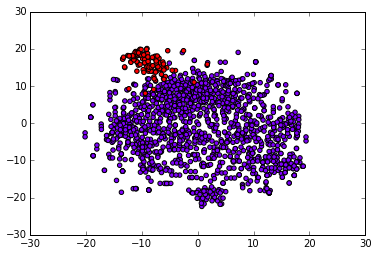

In [26]:
plot_points(X_pca_tsne, labels)

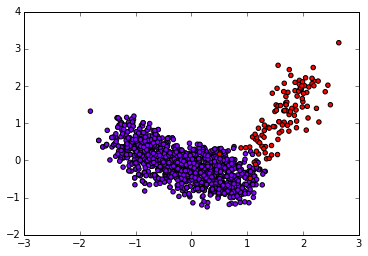

In [30]:
plot_points(X_pca, labels)